<a href="https://colab.research.google.com/github/Madhuvirat4al/Houseprice-prediction/blob/main/house_prie_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
!git clone https://github.com/Madhuvirat4al/Houseprice-prediction.git

fatal: destination path 'Houseprice-prediction' already exists and is not an empty directory.


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/housing.csv')



In [32]:
df.dropna(inplace=True)


In [33]:
from sklearn.model_selection import train_test_split
x=df.drop('median_house_value',axis=1)
y=df['median_house_value']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
train_data=x_train.join(y_train)
train_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
18014,-121.96,37.27,22.0,6114.0,1211.0,2983.0,1163.0,5.2533,<1H OCEAN,269100.0
11520,-118.06,33.72,14.0,2665.0,331.0,964.0,319.0,15.0001,NEAR OCEAN,500001.0
9658,-120.67,37.37,18.0,164.0,30.0,104.0,32.0,1.6607,INLAND,87500.0
2726,-115.54,32.79,30.0,752.0,194.0,733.0,186.0,1.6607,INLAND,56100.0
1837,-122.30,37.90,35.0,1102.0,308.0,688.0,303.0,2.3946,NEAR BAY,141700.0
...,...,...,...,...,...,...,...,...,...,...
6580,-118.19,34.21,41.0,1602.0,228.0,680.0,225.0,6.5530,<1H OCEAN,500001.0
8585,-118.40,33.89,36.0,2127.0,314.0,807.0,306.0,8.1596,<1H OCEAN,500001.0
2152,-119.79,36.77,30.0,1610.0,410.0,1000.0,397.0,2.0357,INLAND,60200.0
4270,-118.33,34.10,48.0,1116.0,524.0,1610.0,483.0,1.6250,<1H OCEAN,237500.0


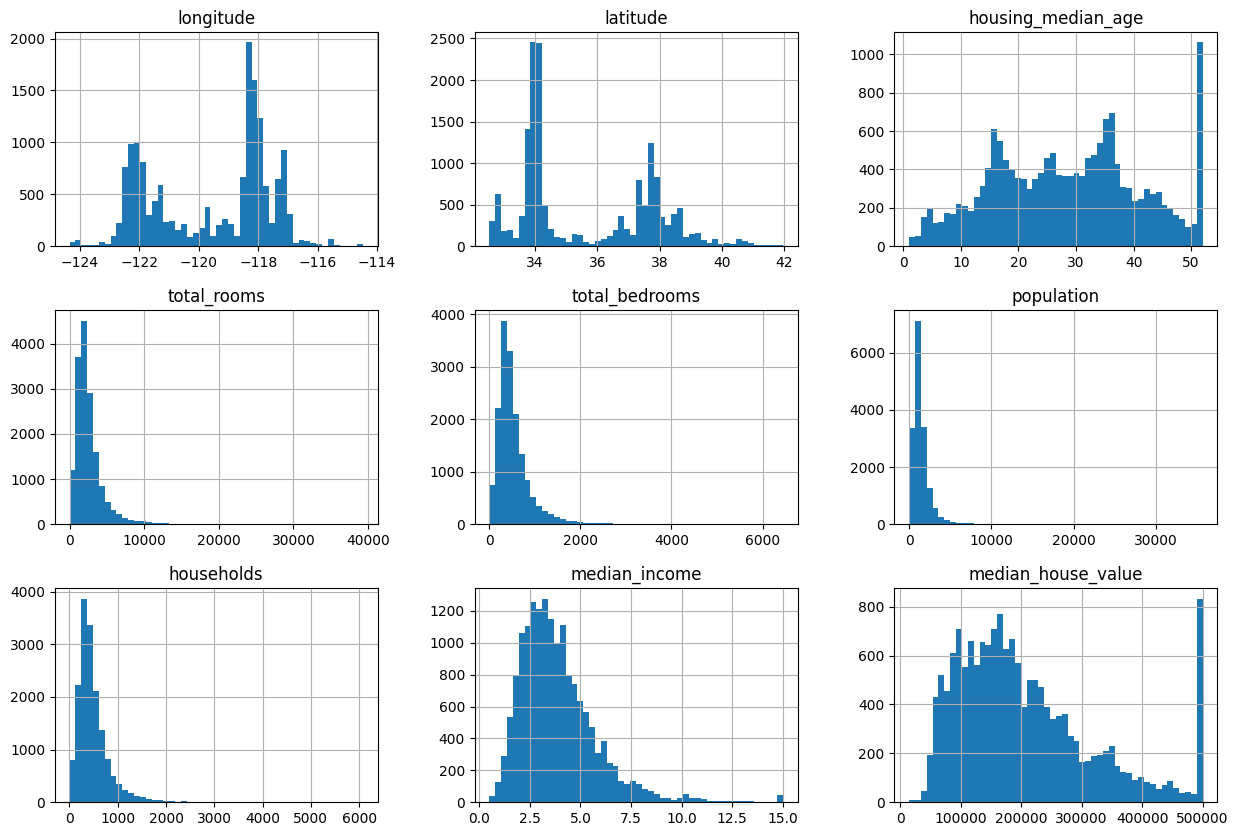

In [34]:
train_data.hist(figsize=(15,10),bins=50)
plt.show()

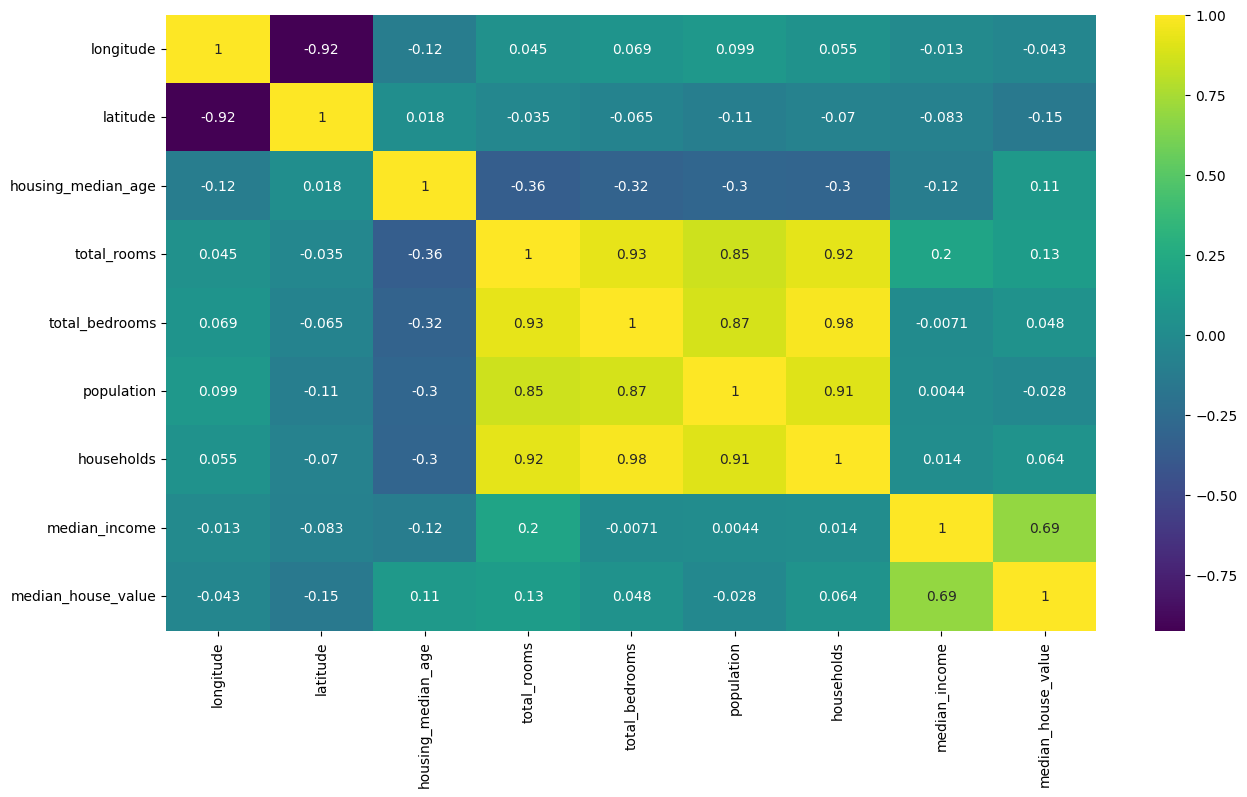

In [35]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap='viridis')
plt.show()


In [36]:
train_data['total_rooms']=np.log(train_data['total_rooms'])
train_data['total_bedrooms']=np.log(train_data['total_bedrooms'])
train_data['population']=np.log(train_data['population'])
train_data['households']=np.log(train_data['households'])



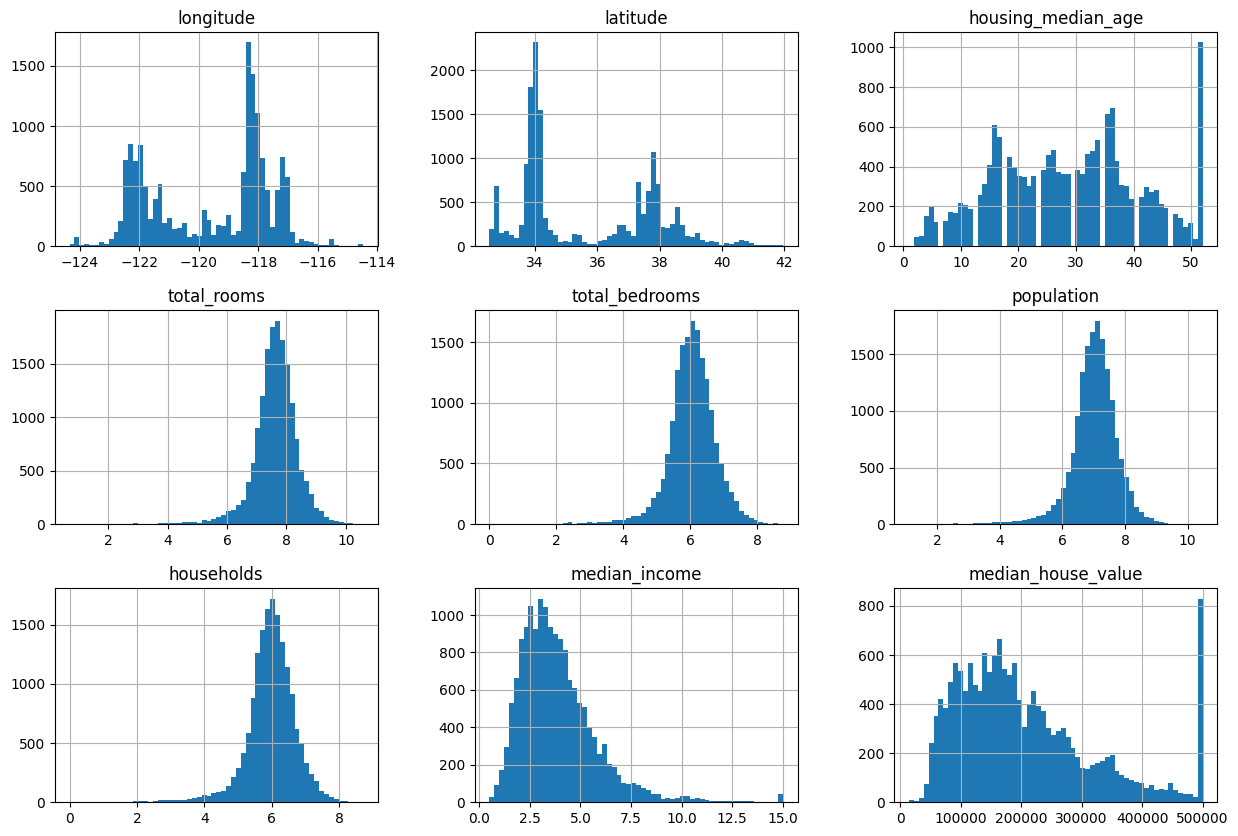

In [37]:
train_data.hist(figsize=(15,10),bins=60)
plt.show()

In [38]:
train_data.ocean_proximity.value_counts()


,count
ocean_proximity,
<1H OCEAN,7278
INLAND,5155
NEAR OCEAN,2095
NEAR BAY,1814
ISLAND,4


In [39]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [40]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
18014,-121.96,37.27,22.0,8.718337,7.099202,8.000685,7.058758,5.2533,269100.0,True,False,False,False,False
11520,-118.06,33.72,14.0,7.887959,5.802118,6.871091,5.765191,15.0001,500001.0,False,False,False,False,True
9658,-120.67,37.37,18.0,5.099866,3.401197,4.644391,3.465736,1.6607,87500.0,False,True,False,False,False
2726,-115.54,32.79,30.0,6.622736,5.267858,6.597146,5.225747,1.6607,56100.0,False,True,False,False,False
1837,-122.30,37.90,35.0,7.004882,5.730100,6.533789,5.713733,2.3946,141700.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6580,-118.19,34.21,41.0,7.379008,5.429346,6.522093,5.416100,6.5530,500001.0,True,False,False,False,False
8585,-118.40,33.89,36.0,7.662468,5.749393,6.693324,5.723585,8.1596,500001.0,True,False,False,False,False
2152,-119.79,36.77,30.0,7.383989,6.016157,6.907755,5.983936,2.0357,60200.0,False,True,False,False,False
4270,-118.33,34.10,48.0,7.017506,6.261492,7.383989,6.180017,1.6250,237500.0,True,False,False,False,False


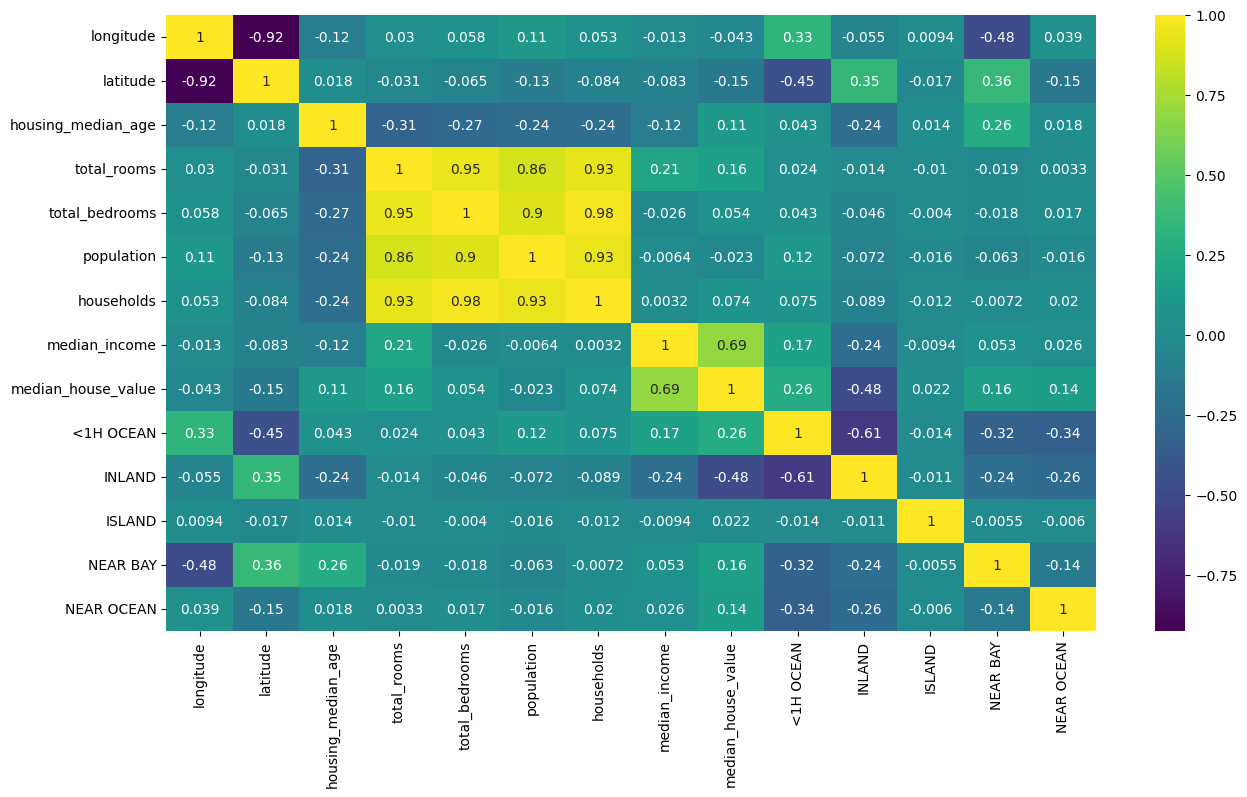

In [41]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap='viridis')
plt.show()

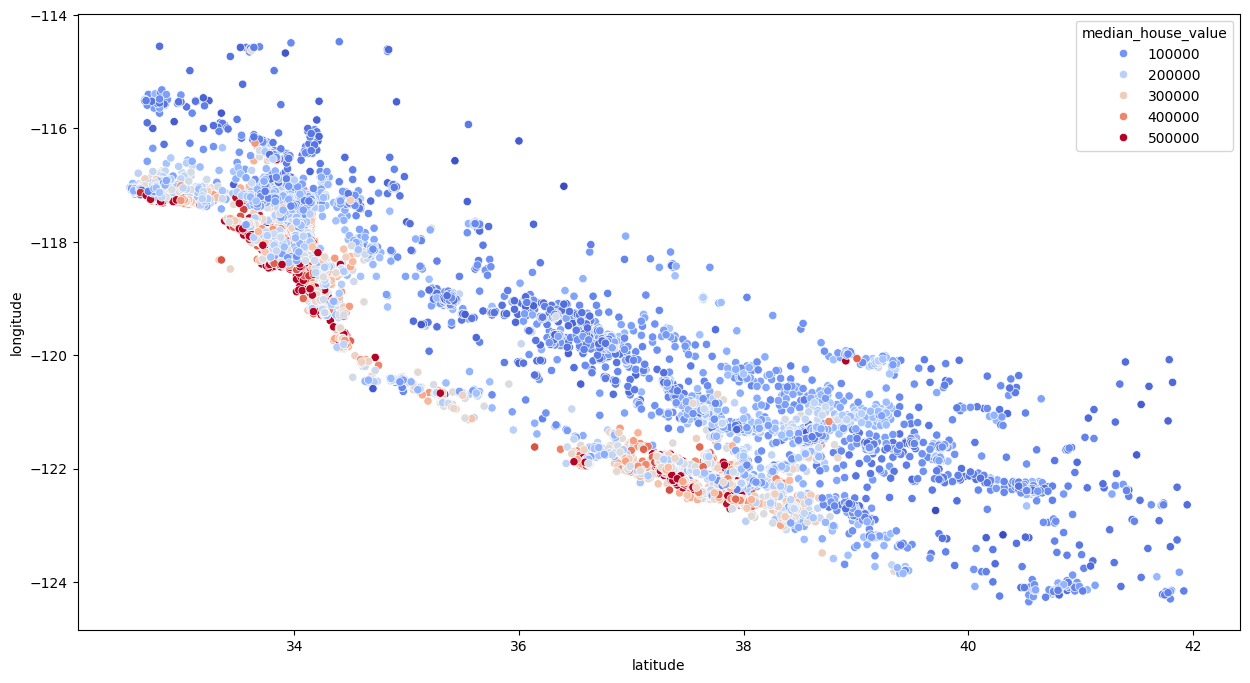

In [42]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude',data=train_data,hue='median_house_value',palette='coolwarm')
plt.show()


In [43]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['population_ratio']=train_data['population']/train_data['households']

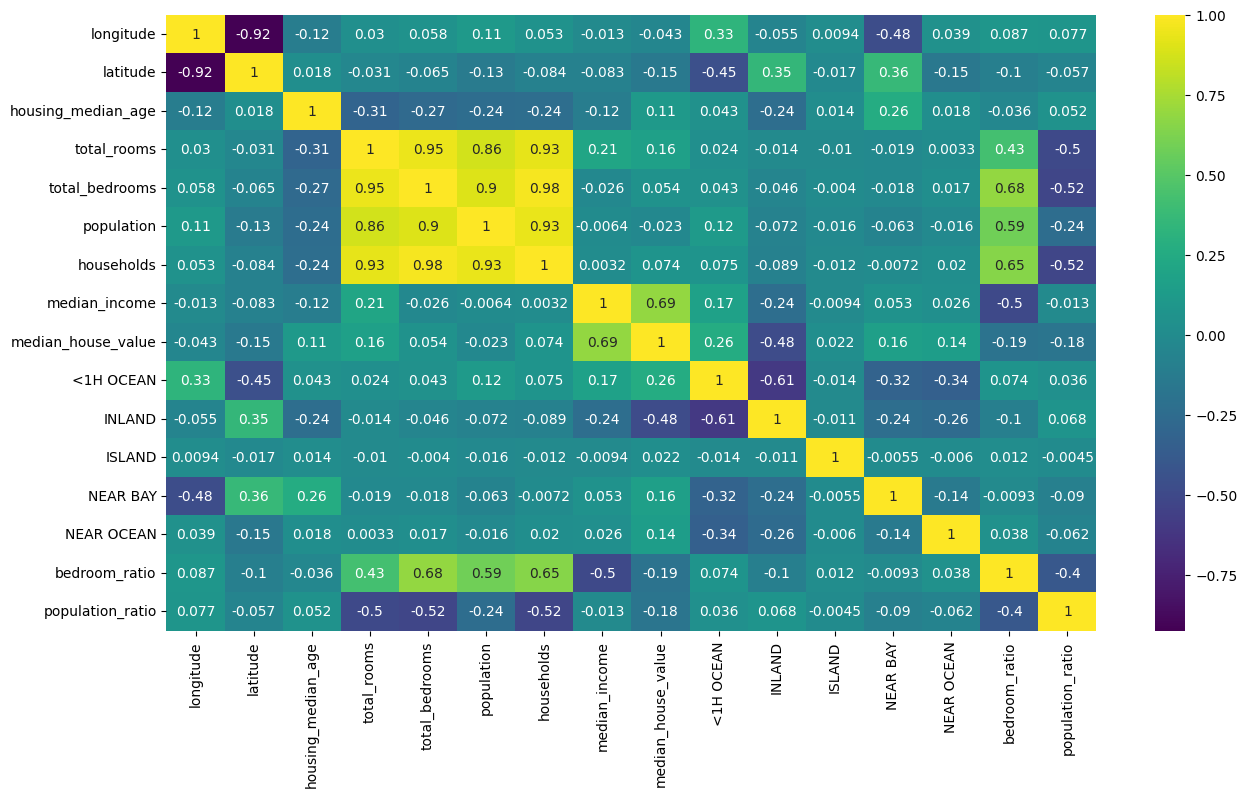

In [44]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap='viridis')
plt.show()


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Initialize scaler and linear regression
scaler = StandardScaler()
reg = LinearRegression()

# Separate x_train and y_train from train_data
x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

# Replace inf with NaN in x_train, then drop rows with NaN values in both x_train and y_train
train_data = pd.concat([x_train, y_train], axis=1)  # Concatenate to ensure rows with NaNs are removed from both
train_data = train_data.replace([np.inf, -np.inf], np.nan).dropna()

# Separate cleaned x_train and y_train
x_train = train_data.drop(['median_house_value'], axis=1)
y_train = train_data['median_house_value']

# Scale the cleaned x_train
x_train_s = scaler.fit_transform(x_train)

# Fit the model using scaled features
reg.fit(x_train_s, y_train)


LinearRegression()

In [46]:
test_data = x_test.join(y_test)
test_data['total_rooms'] = np.log(test_data['total_rooms'])
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'])
test_data['population'] = np.log(test_data['population'])
test_data['households'] = np.log(test_data['households'])
test_data = test_data.join(pd.get_dummies(test_data['ocean_proximity'])).drop(['ocean_proximity'], axis=1)
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['population_ratio'] = test_data['population'] / test_data['households']


In [47]:
x_test, y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']




In [48]:
x_test_s=scaler.transform(x_test)

In [49]:
reg.score(x_test_s,y_test)


0.67350316504281

In [50]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(x_train_s,y_train)

RandomForestRegressor()

In [51]:
forest.score(x_test_s,y_test)

0.8065251976519177

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200],  # Reduce the number of estimators for speed
    "min_samples_split": [2, 4],
    "max_depth": [None, 8]       # Reduce max_depth options
}
grid_search = GridSearchCV(forest, param_grid, cv=3, scoring='neg_mean_squared_error',
                           return_train_score=True, n_jobs=4)
grid_search.fit(x_train_s, y_train)


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'max_depth': [None, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [53]:
best_forest=grid_search.best_estimator_

In [54]:
best_forest.score(x_test_s,y_test)

0.8049174960587235